# 빅데이터 분석기사 실기

## 퇴근후딴짓 참고

## 작업형 3유형 연습

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from scipy import stats
from scipy.stats import poisson
from scipy.stats import binom
import statsmodels.api as sm
from statsmodels.formula.api import ols

### 포아송분포

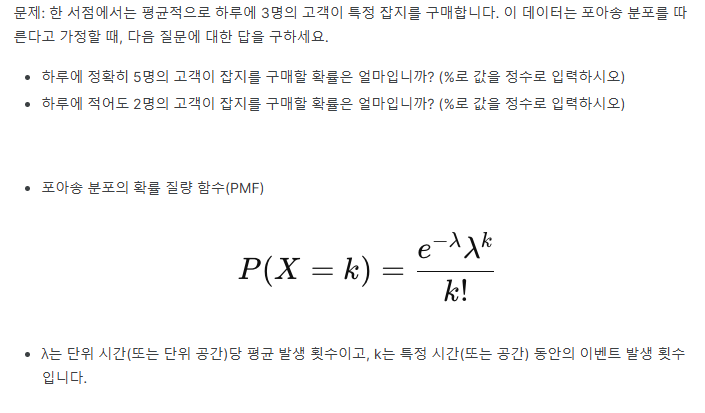

In [2]:
# 평균 발생 횟수(하루에 잡지를 구매하는 고객 수)
lambda_ = 3

# 하루에 정확히 5명의 고객이 잡지를 구매할 확률
print(poisson.pmf(5, lambda_))

0.10081881344492458


In [3]:
# 하루에 적어도 2명의 고객이 잡지를 구매할 확률
print(1 - poisson.cdf(1, lambda_))

0.8008517265285442


### 독립성 검정

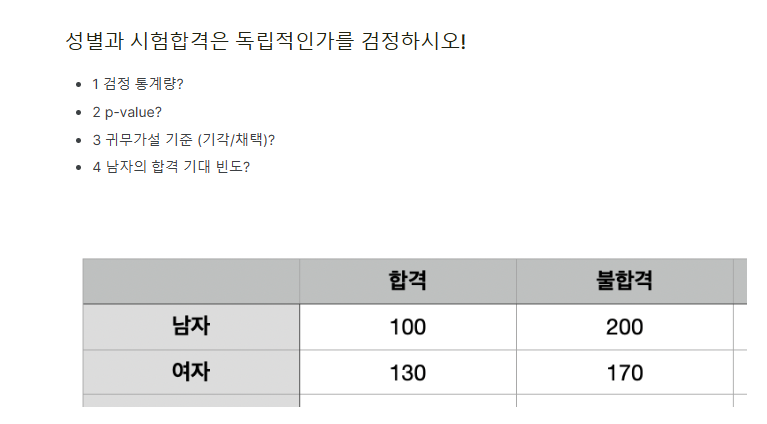

In [4]:
# 데이터 프레임 생성
df = pd.DataFrame({'남자': [100, 200],
                   '여자': [130, 170]},
                  index=['합격', '불합격'])

# 데이터 프레임 출력
print(df)

      남자   여자
합격   100  130
불합격  200  170


In [5]:
# 카이제곱 검정 수행
statistic, pvalue, dof, expected = stats.chi2_contingency(df)

# 결과 출력
print(f'검정통계량: {statistic}')
print(f'p-value: {pvalue}')
print(f'남자의 합격 기대빈도: {expected[0][0]}')

검정통계량: 5.929494712103407
p-value: 0.01488951060599475
남자의 합격 기대빈도: 115.0


### 남자의 합격 기대빈도
1. 남자의 총합 (100 + 200)과 합격자의 총합 (100 + 130)을 구한다.
2. 이를 전체 합계(600)로 나눈다.
* **큰 차이**: 실제 빈도와 기대 빈도 사이에 큰 차이가 있다면, 이는 두 변수 사이에 어떤 관계가 있을 가능성이 높다는 것을 의미합니다. 이 경우, 귀무 가설을 기각하고 대립 가설을 받아들일 수 있습니다.
* **작은 차이**: 차이가 작거나 없다면, 두 변수 사이에 유의미한 관계가 없다고 볼 수 있으며, 귀무 가설을 기각할 충분한 근거가 없습니다.

### 베르누이분포와 이항분포

* [베르누이 분포] 다음 데이터는 100번의 시도에서 각각 성공(1) 또는 실패(0)를 나타냅니다. 이 데이터를 바탕으로 각 시도의 성공 확률을 계산하시오.
* [이항분포] 1번 문제에서 계산한 성공 확률을 사용하여, 100번의 시도 중 정확히 60번 성공할 확률을 계산하시오.

In [6]:
df = pd.read_csv('C:/Users/chunc/Desktop/빅분기 연습/t3_success.csv')
df.head()

,Success
0,1
1,0
2,0
3,1
4,1


In [7]:
# 1. 베르누이 분포: 각 시도의 성공 확률 계산
total_attempts = len(df)
number_of_successes = df['Success'].sum()
success_probability = number_of_successes / total_attempts
print(success_probability)

0.62


In [8]:
# 2. 이항 분포: 100번의 시도 중 정확히 60번 성공할 확률 계산
# 시도 횟수
n = 100
# 성공 횟수
k = 60
probability_of_60_successes = binom.pmf(k, n, success_probability)
print(probability_of_60_successes)

0.07464985555860273


### 점추정 및 구간추정

* 데이터셋은 어떤 도시의 일일 평균 온도 입니다.
* **점추정**: 데이터셋을 기반으로 이 도시의 평균 연간 온도를 점추정하세요. (반올림하여 소수 둘째자리까지)
* **구간추정**: 95% 신뢰수준에서 이 도시의 평균 연간 온도에 대한 신뢰구간을 구하세요. (반올림하여 소수 둘째자리까지)

In [9]:
# 데이터 불러오기
temperature_data = pd.read_csv('C:/Users/chunc/Desktop/빅분기 연습/daily_temperatures.csv')
temperature_data.head()

,Daily Average Temperature
0,28.820262
1,22.000786
2,24.893690
3,31.204466
4,29.337790


In [10]:
# 점추정: 샘플 평균 계산
sample_mean = temperature_data['Daily Average Temperature'].mean()

In [11]:
# 구간추정: 샘플 표준편차 계산 및 신뢰구간 계산
confidence_level = 0.95
sample_std = temperature_data['Daily Average Temperature'].std(ddof = 1)   # 자유도 n-1
n_samples = len(temperature_data)

In [12]:
# 95% 신뢰구간 계산
confidence_interval = stats.t.interval(confidence_level, df = n_samples - 1, loc = sample_mean,
                                       scale = sample_std / (n_samples ** 0.5))
sample_mean, confidence_interval

(19.937577543978538, (19.427887094620406, 20.44726799333667))

### 이원 분산 분석

* 크리스마스 장식 종류와 지역에 따라 판매량에 유의미한 차이가 있는지 이원 분산 분석을 통해 검정하세요

1. 크리스마스 장식 종류(트리, 조명, 장식품)가 판매량에 미치는 영향을 분석하세요. 이때, 장식 종류의 F-value, p-value를 구하시오
2. 지역(북부, 남부, 동부, 서부)이 판매량에 미치는 영향을 분석하세요. 이때, 장식 종류의 F-value, p-value를 구하시오
3. 크리스마스 장식 종류와 지역의 상호작용이 판매량에 미치는 영향을 분석하세요. 이때, 장식 종류의 F-value, p-value를 구하시오

In [13]:
df = pd.read_csv('C:/Users/chunc/Desktop/빅분기 연습/christmas_decoration_sales.csv')
df.head()

,Decoration_Type,Region,Sales
0,트리,북부,64
1,트리,남부,67
2,트리,동부,84
3,트리,서부,87
4,트리,북부,87


In [14]:
# 이원 분산 분석
model = ols('Sales ~ C(Decoration_Type) * C(Region)', data = df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Decoration_Type),2.0,1764.500000,882.250000,2.370578,0.114943
C(Region),3.0,804.305556,268.101852,0.720381,0.549614
C(Decoration_Type):C(Region),6.0,5153.944444,858.990741,2.308081,0.066915
Residual,24.0,8932.000000,372.166667,NaN,NaN


In [15]:
# F-value, P-value
# 1. 2.370578, 0.114943
# 2. 0.720381, 0.549614
# 3. 2.308081, 0.066915